[![kaggle](https://img.shields.io/badge/kaggle-CLICK%20ME!-%2320BEFF?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/code/egorbronnikov/algorithm-composition)

<div align="center"><h2>Композиции алгоритмов</h2></div>

In [3]:
import zipfile
import os

base_dir = "../input/bnp-paribas-cardif-claims-management/train.csv.zip"

with zipfile.ZipFile(base_dir, 'r') as z:
    z.extractall()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

__Задание 2__

In [30]:
data = pd.read_csv("./train.csv", nrows=10000)

In [31]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_real = data.select_dtypes(include=numerics)
data_real.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


__Задание 3__

In [33]:
data_real = data_real.fillna(0)
data_real.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,0.000000,9.191265,0.000000,0.000000,2.301630,0.000000,...,0.000000,0.000000,0.000000,0.598896,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


__Задание 4__

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [293]:
X = data_real.loc[:, "v1":"v131"]
y = data_real["target"]

In [35]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [12]:
bag_clf = BaggingClassifier(n_estimators=100, n_jobs=4, random_state=42)
bag_clf.fit(X, y)

BaggingClassifier(n_estimators=100, n_jobs=4, random_state=42)

In [13]:
rnd_frst_clf = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=42)
rnd_frst_clf.fit(X, y)

RandomForestClassifier(n_jobs=4, random_state=42)

In [14]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [15]:
cvs_dt = cross_val_score(dt_clf, X, y, cv=skf, scoring='accuracy')
cvs_bag = cross_val_score(bag_clf, X, y, cv=skf, scoring='accuracy')
cvs_rnd_frst = cross_val_score(rnd_frst_clf, X, y, cv=skf, scoring='accuracy')

In [16]:
print(f"DecisionTreeClassifier cross_val_score: {cvs_dt}, \t mean: {np.mean(cvs_dt)}")
print(f"BaggingClassifier cross_val_score: {cvs_bag}, \t\t mean: {np.mean(cvs_bag)}")
print(f"RandomForestClassifier cross_val_score: {cvs_rnd_frst}, \t mean: {np.mean(cvs_rnd_frst)}")

DecisionTreeClassifier cross_val_score: [0.65746851 0.64866487 0.66666667], 	 mean: 0.6576000131506851
BaggingClassifier cross_val_score: [0.74955009 0.74887489 0.7479748 ], 		 mean: 0.7487999249835001
RandomForestClassifier cross_val_score: [0.75344931 0.75367537 0.75487549], 	 mean: 0.7540000550744937


На основании полученных результатов, можно сделать вывод, что лучше всего классифицировал $-$ случайный лес.

__Задание 5__

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [18]:
rnd_frst_clf_huge = RandomForestClassifier(n_jobs=4, random_state=42, warm_start=True)

In [19]:
accuracy_results = []

for i in range(20, 1020, 20):
    rnd_frst_clf_huge.set_params(n_estimators=i)
    rnd_frst_clf_huge.fit(X_train, y_train)
    accuracy_results.append(accuracy_score(rnd_frst_clf_huge.predict(X_test), y_test))

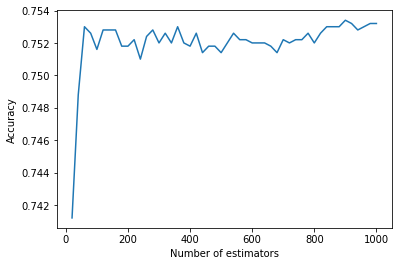

In [20]:
x = list(range(20, 1020, 20))
plt.plot(x, accuracy_results)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

На графике можно видеть, что для некоторых значений `n_estimators` имеет место переобучение.

__Задание 6__

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
xdg_clf = XGBClassifier(random_state=42, n_jobs=4, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

In [26]:
param = {"learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 10], "n_estimators": [10, 100, 500, 1000]}

gs_xdg_clf = GridSearchCV(xdg_clf,
                          param_grid=param,
                          scoring='accuracy',
                          n_jobs=4,
                          cv=skf)

In [27]:
gs_xdg_clf.fit(X, y)

[15:32:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=0, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...None,
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [28]:
print(f"Best param: {gs_xdg_clf.best_params_}")
print(f"Accuracy score: {gs_xdg_clf.score(X, y)}")

Best param: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Accuracy score: 0.8201


__Задание 7__

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

`LabelEncoder`

In [134]:
category_columns = list(set(data.columns).difference(data_real.columns))
selected_category_columns = [category for category in category_columns if len(set(data[category])) < 50]
drop_columns = set(category_columns).difference(selected_category_columns)

In [135]:
data_category = data.drop(drop_columns, axis=1)
data_category = data_category.fillna(0)

In [136]:
label_encoder_data = data_category
le = LabelEncoder()

for category in selected_category_columns:
    label_encoder_data[category] = label_encoder_data[category].astype(str)
    label_encoder_data[category] = le.fit_transform(label_encoder_data[category])

In [137]:
label_encoder_data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3,3.921026,7.915266,2.599278,3.176895,0.012941,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,3,0.000000,9.191265,0.000000,0.000000,2.301630,...,0.000000,0.000000,0.000000,0.598896,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,3,4.410969,5.326159,3.979592,3.928571,0.019645,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,3,4.225930,11.627438,2.097700,1.987549,0.171947,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,3,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


`OneHotEncoder`

In [206]:
category_columns = list(set(data.columns).difference(data_real.columns))
selected_category_columns = [category for category in category_columns if len(set(data[category])) < 50]
drop_columns = set(category_columns).difference(selected_category_columns)

In [207]:
data_category = data.drop(drop_columns, axis=1)
data_category = data_category.fillna(0)

In [208]:
one_hot_encoder_data = data_category

for category in selected_category_columns:
    enc = OneHotEncoder()
    one_hot_encoder_data[category] = one_hot_encoder_data[category].astype(str)
    enc = enc.fit_transform(one_hot_encoder_data[[category]]).toarray()
    encoded_colm = pd.DataFrame(enc)
    encoded_colm.columns = np.array(list(map(lambda x: f"{category} {x}", encoded_colm.columns)))
    one_hot_encoder_data = pd.concat([one_hot_encoder_data, encoded_colm], axis=1)
    one_hot_encoder_data = one_hot_encoder_data.drop([category], axis=1)

In [209]:
one_hot_encoder_data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v47 5,v47 6,v47 7,v47 8,v66 0,v66 1,v66 2,v74 0,v74 1,v74 2
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,1,0.000000,0.000000,0.000000,9.191265,0.000000,0.000000,2.301630,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,8,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


`FrequencyEncoder`

In [210]:
category_columns = list(set(data.columns).difference(data_real.columns))
selected_category_columns = [category for category in category_columns if len(set(data[category])) < 50]
drop_columns = set(category_columns).difference(selected_category_columns)

In [211]:
data_category = data.drop(drop_columns, axis=1)
data_category = data_category.fillna(0)

In [212]:
frequency_encoder_data = data_category

for category in selected_category_columns:
    frequency_encoder_data[category] = frequency_encoder_data[category].astype(str)
    fq = frequency_encoder_data.groupby(category).size() / len(frequency_encoder_data)
    frequency_encoder_data.loc[:, f"{category}_freq_encode"] = frequency_encoder_data[category].map(fq)
    frequency_encoder_data = frequency_encoder_data.drop([category], axis=1)

In [213]:
frequency_encoder_data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v112_freq_encode,v3_freq_encode,v24_freq_encode,v110_freq_encode,v52_freq_encode,v30_freq_encode,v91_freq_encode,v47_freq_encode,v66_freq_encode,v74_freq_encode
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.0316,0.9701,0.1829,0.4885,0.0806,0.2800,0.2398,0.4885,0.2278,0.9942
1,4,1,0.000000,0.000000,0.000000,9.191265,0.000000,0.000000,2.301630,0.000000,...,0.0395,0.9701,0.1829,0.4854,0.0806,0.2800,0.1975,0.0436,0.6147,0.9942
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0.0077,0.9701,0.4823,0.4885,0.0816,0.5273,0.2194,0.4885,0.6147,0.9942
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,0.0348,0.9701,0.2318,0.4885,0.0740,0.2800,0.1975,0.4885,0.6147,0.9942
4,8,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0392,0.9701,0.4823,0.4854,0.0740,0.5273,0.2194,0.3426,0.2278,0.9942


__Задание 8__

`LabelEncoder`

In [154]:
X_label_encoder = label_encoder_data.drop(["ID", "target"], axis=1)
y_label_encoder = label_encoder_data["target"]

In [157]:
%time gs_xdg_clf.fit(X_label_encoder, y_label_encoder)

[16:46:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 710 ms, sys: 183 ms, total: 892 ms
Wall time: 5min 40s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=0, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...None,
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [158]:
print(f"Best param: {gs_xdg_clf.best_params_}")
print(f"Accuracy score: {gs_xdg_clf.score(X_label_encoder, y_label_encoder)}")

Best param: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
Accuracy score: 0.7743


`OneHotEncoder`

In [214]:
X_one_hot_encoder = one_hot_encoder_data.drop(["ID", "target"], axis=1)
y_one_hot_encoder = one_hot_encoder_data["target"]

In [215]:
%time gs_xdg_clf.fit(X_one_hot_encoder, y_one_hot_encoder)

[16:54:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=0, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...None,
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [216]:
print(f"Best param: {gs_xdg_clf.best_params_}")
print(f"Accuracy score: {gs_xdg_clf.score(X_one_hot_encoder, y_one_hot_encoder)}")

Best param: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Accuracy score: 0.7818


`FrequencyEncoder`

In [217]:
X_frequency_encoder = frequency_encoder_data.drop(["ID", "target"], axis=1)
y_frequency_encoder = frequency_encoder_data["target"]

In [218]:
%time gs_xdg_clf.fit(X_frequency_encoder, y_frequency_encoder)

[16:54:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=0, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...None,
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [219]:
print(f"Best param: {gs_xdg_clf.best_params_}")
print(f"Accuracy score: {gs_xdg_clf.score(X_frequency_encoder, y_frequency_encoder)}")

Best param: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy score: 0.7929


_Результаты по времени_
- `LabelEncoder`: 5min 40s
- `OneHotEncoder`: 6min 56s
- `FrequencyEncoder`: 5min 27s

_Выводы_

Можно видеть, что оптимальная глубина деревьев не меняется от способа кодирования категориальных признаков.

__Задание 9__

In [222]:
from catboost import CatBoostClassifier

In [254]:
category_columns = list(set(data.columns).difference(data_real.columns))
data_category = data.fillna(0)

In [255]:
for category in category_columns:
    data_category[category] = data_category[category].astype(str)

In [283]:
cat_clf = CatBoostClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, cat_features=category_columns, task_type="GPU", devices='0:1')

In [284]:
X = data_category.drop(["ID", "target"], axis=1)
y = data_category["target"]

In [285]:
%time cat_clf.fit(X, y, cat_features=category_columns)

0:	learn: 0.6655747	total: 13.3ms	remaining: 1.31s
1:	learn: 0.6386000	total: 24.1ms	remaining: 1.18s
2:	learn: 0.6184685	total: 35.2ms	remaining: 1.14s
3:	learn: 0.6040248	total: 46ms	remaining: 1.1s
4:	learn: 0.5908712	total: 56.8ms	remaining: 1.08s
5:	learn: 0.5804446	total: 67.6ms	remaining: 1.06s
6:	learn: 0.5699228	total: 78.3ms	remaining: 1.04s
7:	learn: 0.5617078	total: 89ms	remaining: 1.02s
8:	learn: 0.5563842	total: 99.7ms	remaining: 1.01s
9:	learn: 0.5479408	total: 111ms	remaining: 995ms
10:	learn: 0.5394428	total: 121ms	remaining: 980ms
11:	learn: 0.5329968	total: 132ms	remaining: 966ms
12:	learn: 0.5278368	total: 142ms	remaining: 952ms
13:	learn: 0.5242624	total: 153ms	remaining: 940ms
14:	learn: 0.5205729	total: 164ms	remaining: 927ms
15:	learn: 0.5177436	total: 174ms	remaining: 915ms
16:	learn: 0.5142561	total: 185ms	remaining: 903ms
17:	learn: 0.5116709	total: 195ms	remaining: 890ms
18:	learn: 0.5084678	total: 206ms	remaining: 878ms
19:	learn: 0.5060740	total: 220ms	rem

In [286]:
cvs_cat_clf = cross_val_score(cat_clf, X, y, cv=skf, scoring='accuracy')

0:	learn: 0.6655312	total: 11.9ms	remaining: 1.18s
1:	learn: 0.6398833	total: 23.8ms	remaining: 1.16s
2:	learn: 0.6204026	total: 34.4ms	remaining: 1.11s
3:	learn: 0.6038160	total: 45.1ms	remaining: 1.08s
4:	learn: 0.5907157	total: 55.7ms	remaining: 1.06s
5:	learn: 0.5806127	total: 66.4ms	remaining: 1.04s
6:	learn: 0.5703592	total: 77.1ms	remaining: 1.02s
7:	learn: 0.5621892	total: 87.6ms	remaining: 1.01s
8:	learn: 0.5568193	total: 98.1ms	remaining: 992ms
9:	learn: 0.5478363	total: 109ms	remaining: 979ms
10:	learn: 0.5408944	total: 119ms	remaining: 966ms
11:	learn: 0.5340883	total: 131ms	remaining: 963ms
12:	learn: 0.5291307	total: 143ms	remaining: 954ms
13:	learn: 0.5253118	total: 153ms	remaining: 942ms
14:	learn: 0.5224438	total: 164ms	remaining: 930ms
15:	learn: 0.5198807	total: 175ms	remaining: 918ms
16:	learn: 0.5178215	total: 185ms	remaining: 905ms
17:	learn: 0.5150259	total: 196ms	remaining: 892ms
18:	learn: 0.5124208	total: 206ms	remaining: 880ms
19:	learn: 0.5096095	total: 219m

In [288]:
print(f"CatBoostClassifier cross_val_score: {cvs_cat_clf}, \t mean: {np.mean(cvs_cat_clf)}")

CatBoostClassifier cross_val_score: [0.77294541 0.77527753 0.76957696], 	 mean: 0.7725999654554538


_Выводы_

Получается, что XGBoost сработал в данном случае лучше, чем CatBoost.

__Задание 10__

In [289]:
from lightgbm import LGBMClassifier

In [290]:
lgbm_clf = LGBMClassifier(random_state=42, n_jobs=4, device='gpu')

In [295]:
param = {"learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 10], "n_estimators": [10, 100, 500, 1000]}

gs_lgbm_clf = GridSearchCV(lgbm_clf,
                          param_grid=param,
                          scoring='accuracy',
                          n_jobs=4,
                          cv=skf)

In [297]:
%time gs_lgbm_clf.fit(X_frequency_encoder, y_frequency_encoder)

CPU times: user 3.79 s, sys: 881 ms, total: 4.67 s
Wall time: 7min 46s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LGBMClassifier(device='gpu', n_jobs=4, random_state=42),
             n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 100, 500, 1000]},
             scoring='accuracy')

In [299]:
print(f"Best param: {gs_lgbm_clf.best_params_}")
print(f"Accuracy score: {gs_lgbm_clf.score(X_frequency_encoder, y_frequency_encoder)}")

Best param: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Accuracy score: 0.7824
